<h1><center>Projet en Fouille de Données</center></h1>

<div align="right">
    Réalisé Par: <br> YOUSFI Naila
   <br> BOUBRAHMI Houda</div>

<h3>1- Lire le README file et comprendre les données</h3>


<h3> 2- Charger les données dans python</h3>

In [2]:
#on fait premierement l'import des packages dont on aura besoin par la suite 
import numpy as np #librairie de calcul scientifique
import matplotlib.pyplot as plt #module pour la visualisation
import pandas as pd #module pour lire les données des sources extérieures et les manipuler
import tsfresh #pour l’extraction des features
import warnings #warnings


In [3]:
master_df=pd.DataFrame() #création d'un dataframe qui est vide

In [4]:
#Une liste qui contient les noms des classes
class_names=['Working at Computer','Standing Up, Walking and Going up\down stairs','Standing','Walking','Going Up\Down Stairs','Walking and Talking with Someone','Talking while Standing']
#Une liste qui contient les indices des classes
classes=[1,2,3,4,5,6,7]

In [5]:
id=0 #Initialisation id à zéro

In [6]:
y=[] #une liste Vide

In [7]:
#chargement des données des differents csv à l'aide de la méthode read_csv de pandas
#la méthode prend en paramètre le fichier csv ,la séparation qui est une virgule dans ce cas
#et pour ajouter un nom au colonnes on a ajouté le parametre names car les noms ne sont pas définis dans les fichiers

df1=pd.read_csv("1.csv",sep=',',names=['step','x','y','z','class']) 
df2=pd.read_csv("2.csv",sep=',',names=['step','x','y','z','class'])
df3=pd.read_csv("3.csv",sep=',',names=['step','x','y','z','class'])
df4=pd.read_csv("4.csv",sep=',',names=['step','x','y','z','class'])
df5=pd.read_csv("5.csv",sep=',',names=['step','x','y','z','class'])
df6=pd.read_csv("6.csv",sep=',',names=['step','x','y','z','class'])
df7=pd.read_csv("7.csv",sep=',',names=['step','x','y','z','class'])
df8=pd.read_csv("8.csv",sep=',',names=['step','x','y','z','class'])
df9=pd.read_csv("9.csv",sep=',',names=['step','x','y','z','class'])
df10=pd.read_csv("10.csv",sep=',',names=['step','x','y','z','class'])
df11=pd.read_csv("11.csv",sep=',',names=['step','x','y','z','class'])
df12=pd.read_csv("12.csv",sep=',',names=['step','x','y','z','class'])
df13=pd.read_csv("13.csv",sep=',',names=['step','x','y','z','class'])
df14=pd.read_csv("14.csv",sep=',',names=['step','x','y','z','class'])
df15=pd.read_csv("15.csv",sep=',',names=['step','x','y','z','class'])

In [8]:
#pour s'assurer du chargment des données on visualise shape de
print(df2.shape)

(138001, 5)


In [9]:
#on supprime des 15 fichiers la colonne step qui va pas nous servir
df1 = df1.drop('step', 1)
df2 = df2.drop('step', 1)
df3 = df3.drop('step', 1)
df4 = df4.drop('step', 1)
df5 = df5.drop('step', 1)
df6 = df6.drop('step', 1)
df7 = df7.drop('step', 1)
df8 = df8.drop('step', 1)
df9 = df9.drop('step', 1)
df10 = df10.drop('step', 1)
df11 = df11.drop('step', 1)
df12 = df12.drop('step', 1)
df13 = df13.drop('step', 1)
df14 = df14.drop('step', 1)
df15 = df15.drop('step', 1)


In [10]:
#on supprime toutes les lignes ayant pour classe 0
df1 = df1.drop(df1[df1['class'] == 0].index)
df2 = df2.drop(df2[df2['class'] == 0].index)
df3 = df3.drop(df3[df3['class'] == 0].index)
df4 = df4.drop(df4[df4['class'] == 0].index)
df5 = df5.drop(df5[df5['class'] == 0].index)
df6 = df6.drop(df6[df6['class'] == 0].index)
df7 = df7.drop(df7[df7['class'] == 0].index)
df8 = df8.drop(df8[df8['class'] == 0].index)
df9 = df9.drop(df9[df9['class'] == 0].index)
df10 = df10.drop(df10[df10['class'] == 0].index)
df11 = df11.drop(df11[df11['class'] == 0].index)
df12 = df12.drop(df12[df12['class'] == 0].index)
df13 = df13.drop(df13[df13['class'] == 0].index)
df14 = df14.drop(df14[df14['class'] == 0].index)
df15 = df15.drop(df15[df15['class'] == 0].index)

In [11]:
#on vérifie avec le fichier 2 qui contenant des classes 0 à sa fin
print(df2.tail())

           x     y     z  class
137995  2150  2316  1979      7
137996  2142  2314  1985      7
137997  2139  2301  1992      7
137998  2136  2315  1990      7
137999  2134  2320  1982      7


<h3>3- Visualisation d'un exemple de chaque classe (chaque activité)</h3>

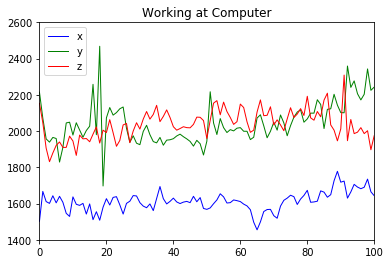

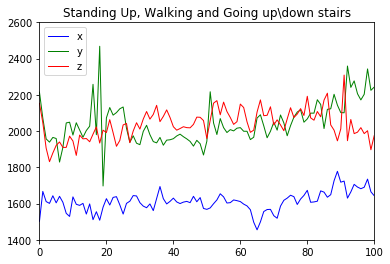

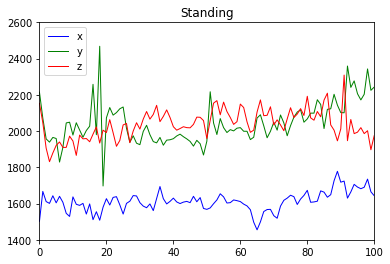

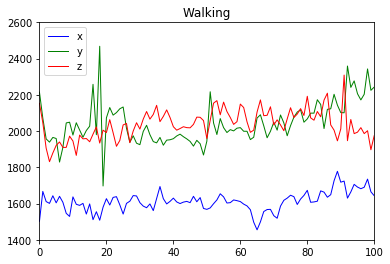

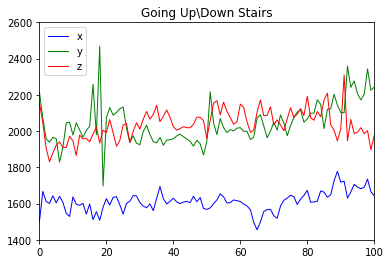

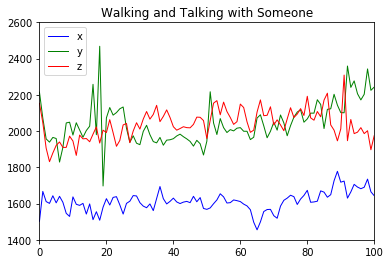

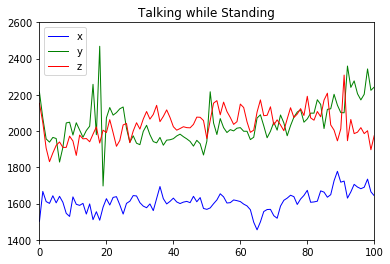

In [13]:
#on visualise le diagramme pour chaque classe
for i in range(0,7):
    np.where(df1['class'] == i)
#on définit le min de l'axis x à 0 le max à 100 et le min de y à 1400 et le max à 2600
    plt.axis([0, 100, 1400, 2600])
    #on affiche le titre de chaque diagramme à savoir le nom de la classe représenté
    plt.title(class_names[i])
    #on définit la couleur le style de la courbe ainsi que l'épaisseur de la ligne pour x,y,z
    plt.plot(df1.x, color='blue', linestyle='-',linewidth=1, markersize=12)
    plt.plot(df1.y, color='green', linestyle='-',linewidth=1, markersize=12)
    plt.plot(df1.z, color='red', linestyle='-',linewidth=1, markersize=12)
    #on affiche la légende qui permet de savoir que représente chaque couleur
    plt.legend()
    plt.show()

<h3>4-Préparation de données</h3>

In [13]:
#on définit la fonction préparation avec un length de 100
def Preparation(df, id, y, length=100):
    rdf=pd.DataFrame() #création d'un dataframe vide
    df_class=pd.DataFrame()#création d'un dataframe vide
    #on boucle sur la liste classes
    for i in classes:
        #on remplit  le dataframe df_class par les lignes appartenant à la classe actuelle dans la boucle
        df_class=df[df['class']==i]
        #nous divisons le dataframe df_class en fonction de length afin d'obtenir différents dataframes 
        df_i=np.array_split(df_class,(len(df_class)/length))
        #nous stockons les classes du dataframe actuel dans y
        for dfr in df_i:
            y.append(i)
            #supression de la colonne classe dans le df
        for x in range(len(df_i)) :
            df_i[x]=df_i[x].drop('class',1)
            #creation d'une colonne id dans le df actuel et incrémentaion du paramétre id
        for x in range(len(df_i)):
                df_i[x]['id']=id
                id=id+1
                #ajout du df actuel au df rdf
                rdf=rdf.append(df_i[x])
#retourner le df rdf, la liste y, et le paramétre id                
    return rdf,y,id
    
#regrouper les dfi dans le master_df
for i in range(1,16):
        temp_df,y,id=Preparation(eval("df" + str(i)),id,y,100)#on fait appel à la fonction préparation prenant comme parametre les dfi,id,y et le length qui 100
        master_df=master_df.append(temp_df)
print(master_df)

           x     y     z     id
0       1502  2215  2153      0
1       1667  2072  2047      0
2       1611  1957  1906      0
3       1601  1939  1831      0
4       1643  1965  1879      0
5       1604  1959  1921      0
6       1640  1829  1940      0
7       1607  1910  1910      0
8       1546  2045  1910      0
9       1529  2049  1972      0
10      1637  1978  1945      0
11      1596  2046  1866      0
12      1590  2006  1978      0
13      1601  1966  1957      0
14      1542  2003  1959      0
15      1598  2027  1941      0
16      1511  2258  1983      0
17      1555  1980  2023      0
18      1508  2468  1934      0
19      1580  1697  2005      0
20      1627  2073  1992      0
21      1592  2130  2063      0
22      1634  2088  1991      0
23      1638  2102  1916      0
24      1593  2123  1948      0
25      1542  2133  2034      0
26      1601  2015  2042      0
27      1613  1938  1936      0
28      1644  1974  2000      0
29      1642  1933  2046      0
...     

In [15]:
#vérification que y est bien remplie et que sa longueur est égale à id
print(len(y))
print(id)

0
0


In [15]:
#vérifier que la longeur de master df est bien égale à la somme des longueurs des 15 fichiers
s=0
for i in range(1,16):
        s=s+len(eval("df" + str(i)))
print(s)

1923177


In [16]:
#extraction des features à partir de master_df avec minimalFCParemeters afin de ne pas alourdir le traitement
from tsfresh.feature_extraction import MinimalFCParameters,extract_features
settings=MinimalFCParameters()
X=extract_features(master_df,column_id="id",default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 10/10 [00:14<00:00,  1.33s/it]


In [17]:
print(X)

variable  x__length  x__maximum      x__mean  x__median  x__minimum  \
id                                                                    
0             101.0      1778.0  1611.950495     1610.0      1455.0   
1             101.0      2356.0  1992.168317     2053.0      1559.0   
2             101.0      2118.0  1954.386139     1963.0      1681.0   
3             101.0      2034.0  1951.881188     1954.0      1842.0   
4             101.0      1987.0  1960.435644     1961.0      1932.0   
5             101.0      1982.0  1964.138614     1964.0      1942.0   
6             101.0      1986.0  1962.643564     1963.0      1946.0   
7             101.0      1968.0  1952.009901     1952.0      1932.0   
8             101.0      1999.0  1955.188119     1953.0      1925.0   
9             101.0      1972.0  1951.811881     1953.0      1919.0   
10            101.0      1977.0  1962.089109     1962.0      1941.0   
11            101.0      1980.0  1968.079208     1968.0      1952.0   
12    

<h3>5-Transformation en vecteurs features</h3>

In [18]:
#Création de deux échantillons ; apprentissage et évaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
#Import du package neighbos pour utiliser le classifier KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# On va utiliser le k-nearest neighbor classifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X, y)
print("Les classes réelles des  éléments de X:")
print(y)

# On a fait la prediction des éléments de X
print("Prédiction des classes des éléments de X:")
clfK=clf.predict(X)
print(clfK)

# Même on peut avoir une prédiction avec les probabilités des classes
print("Prédiction des classes probalité des éléments de X:")
print(clf.predict_proba(X))

Les classes réelles des 5 premiers éléments de X:
[1, 1, 1, 1, 1]
Prédiction des classes des éléments de X:
[7 1 1 ... 1 7 7]
Prédiction des classes proba des 5 premiers éléments de X:
[[0.1 0.  0.  0.  0.  0.  0.9]
 [0.7 0.2 0.1 0.  0.  0.  0. ]
 [0.3 0.2 0.1 0.  0.3 0.  0.1]
 [0.2 0.  0.2 0.  0.  0.4 0.2]
 [1.  0.  0.  0.  0.  0.  0. ]]


In [25]:

# Utiliser une arbre de décision au lieu de kNearestNeighbor
#   et reexécuter l'apprentissage sur X et y
#   puis faire de prédiction avec l'arbre pour quelque éléments de X

from sklearn.tree import DecisionTreeClassifier

clfD = DecisionTreeClassifier()
clfD.fit(X,y)
clfD=clfD.predict(X)

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X,y)
clfR=clf.predict(X)

/home/jovyan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
#calcul de la métrique accuraccy de RandomForestClassifier
from sklearn.metrics import accuracy_score
accuracy_score(y,clfR)

0.996143623951222

In [28]:
#calcul de la métrique accuraccy de DecisionTreeClassifier
from sklearn.metrics import accuracy_score
accuracy_score(y,clfD)

1.0

In [29]:
#calcul de la métrique accuraccy de KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy_score(y,clfK)

0.895669393923602

In [30]:
#calcul de la métrique confusion_matrix de KNeighborsClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix(y,clfK)


array([[5798,   24,   50,   46,    4,    3,  153],
       [  74,  277,   30,   44,   14,    5,   28],
       [  66,   14, 1580,  205,   41,    9,  245],
       [  23,    6,  120, 3373,    7,    1,   35],
       [   8,    2,   55,   82,  338,    3,   22],
       [   8,    3,   23,   50,    5,  324,   60],
       [ 116,    4,  172,   68,   28,   46, 5497]])

In [31]:
#calcul de la métrique confusion_matrix de DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix(y,clfD)

array([[6078,    0,    0,    0,    0,    0,    0],
       [   0,  472,    0,    0,    0,    0,    0],
       [   0,    0, 2160,    0,    0,    0,    0],
       [   0,    0,    0, 3565,    0,    0,    0],
       [   0,    0,    0,    0,  510,    0,    0],
       [   0,    0,    0,    0,    0,  473,    0],
       [   0,    0,    0,    0,    0,    0, 5931]])

In [32]:
#calcul de la métrique confusion_matrix de RandomForestClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix(y,clfR)

array([[6074,    0,    2,    0,    0,    0,    2],
       [  11,  461,    0,    0,    0,    0,    0],
       [   3,    0, 2140,    5,    2,    0,   10],
       [   2,    0,    6, 3554,    0,    0,    3],
       [   0,    0,    1,    5,  503,    0,    1],
       [   1,    0,    1,    4,    0,  466,    1],
       [   3,    0,    7,    2,    0,    2, 5917]])

In [40]:
#calcul de la métrique balanced_accuracy_score de RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y,clfR)


0.9904009810581254

In [41]:
#calcul de la métrique balanced_accuracy_score de DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y,clfD)

1.0

In [42]:
#calcul de la métrique balanced_accuracy_score de KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y,clfK)


0.7847115490691153